# ROI resizing

Resizing regions of interest (ROIs) can be useful for investigating the effect of uncertainties in an ROI boundary on other quantities, for example the mean dose to the ROI.  This notebook demonstrates use of [scikit-rt](https://scikit-rt.github.io/scikit-rt/) to increase or decrease an ROI by a given margin.

## Module import and configuration

The following imports modules needed for this example, and sets some options.

In [1]:
from skrt.core import Defaults
from skrt.simulation import SyntheticImage

# In place of interactive images, display static graphics that can be saved with notebook.
# Defaults().no_ui = True
# Omit user part of paths when printing object attributes.
# Defaults().compress_user = True

## Create synthetic data

The following creates a synthetic image, featuring a sphere, and extracts the sphere ROI.

In [2]:
# Image definition
# ================

# Define image shape (rows, columns, slices).
shape = (50, 50, 80)

# Define image origin - (x,y,z) coordinates
# of centre of voxel at row 0, column 0, slice 0.
origin = (0.5, 0.5, 0.5)

# Define (dx,dy,dz) voxel size in mm.
voxel_size = (1, 1, 1)

# Define background greyscale value.
intensity = -1000

# Sphere definition
# =================

# Define sphere radius in mm.
sphere_radius = 12

# Define (x,y,z) coordinates of sphere centre.
sphere_centre = (30, 20, 40)

# Define grey-scale value for sphere.
sphere_intensity = 200

# Define name for sphere ROI.
sphere_name = "sphere"

# Data creation
# =============

# Create image.
sim = SyntheticImage(shape, origin=origin, voxel_size=voxel_size,
                     intensity=intensity)

# Add sphere to image, and retrieve its ROI.
sim.add_sphere(radius=sphere_radius, centre=sphere_centre,
               intensity=sphere_intensity, name=sphere_name)
sphere = sim.get_roi(sphere_name)

## Resized ROI

The following shows how to obtain an ROI that is smaller or larger than the original, using the `resized` method.  The method argument indicates the thickness of the margin to by which the ROI is to be contracted (negative value) or expanded (positive value).  The margin is applied through dilation or erosion of the binary mask representing the ROI, using an approximately spherical structuring element, with radius equal to the absolute value of the margin requested.

In [3]:
# Subtract margin of 5 mm to original sphere.
smaller_sphere = sphere.resized(-5)

# Add margin of 4 mm to original sphere.
larger_sphere = sphere.resized(4)

## Data visualisation

The following displays the synthetic image, with the sphere showing as light grey.  ROI contours are superimposed for the original sphere, the smaller sphere, and the larger sphere.

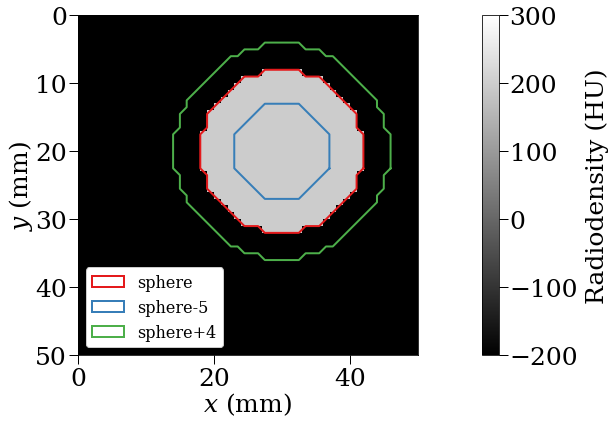

In [4]:
sim.view(rois=[sphere, smaller_sphere, larger_sphere], legend=True, colorbar=True);